# Régression Linéaire Multiple

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Dataset

In [2]:
dataset = pd.read_csv('Advertising.csv')

In [3]:
dataset.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [4]:
dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
dataset.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


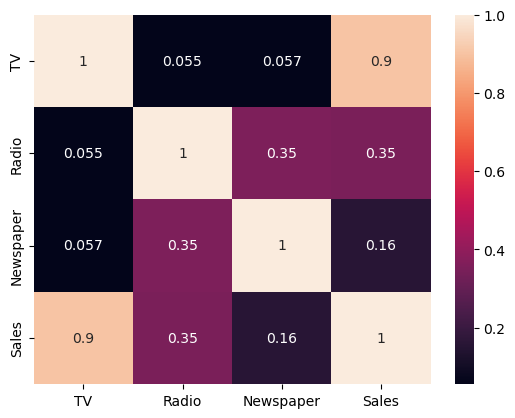

In [6]:
plt.figure()
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [7]:
x = dataset[['TV', 'Radio', 'Newspaper']].values
y = dataset[['Sales']].values

In [8]:
x

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [9]:
y

array([[22.1],
       [10.4],
       [12. ],
       [16.5],
       [17.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [15.6],
       [12.6],
       [17.4],
       [ 9.2],
       [13.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [17.5],
       [ 5.6],
       [20.5],
       [ 9.7],
       [17. ],
       [15. ],
       [20.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [13.2],
       [17.4],
       [11.9],
       [17.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [17.9],
       [ 8.5],
       [16.1],
       [10.6],
       [23.2],
       [19.8],
       [ 9.7],
       [16.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [20.7],
       [14. ],
       [16. ],
       [11.3],
       [11

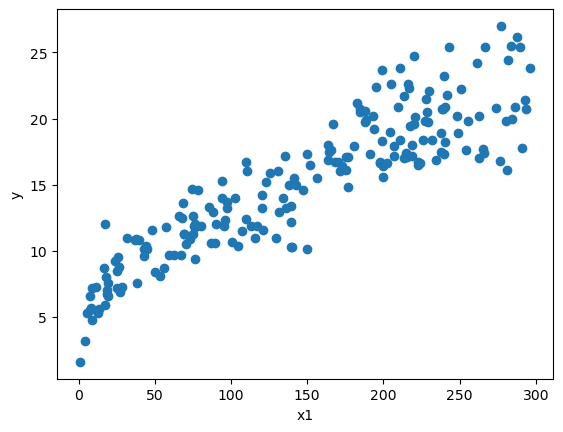

In [10]:
plt.scatter(x[:,0], y)# afficher les résultats. x_1 en abscisse et y en ordonnée
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

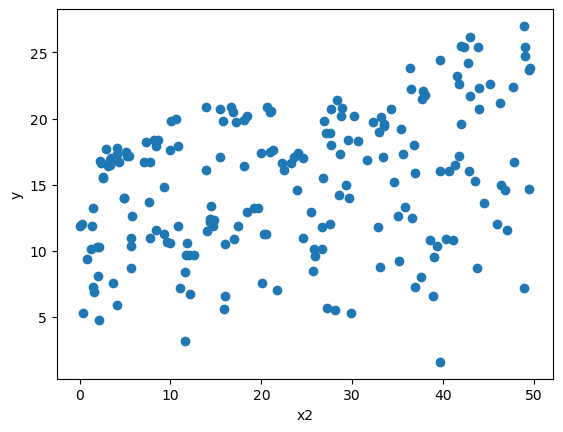

In [11]:
plt.scatter(x[:,1], y)# afficher les résultats. x_2 en abscisse et y en ordonnée
plt.xlabel('x2')
plt.ylabel('y')
plt.show()

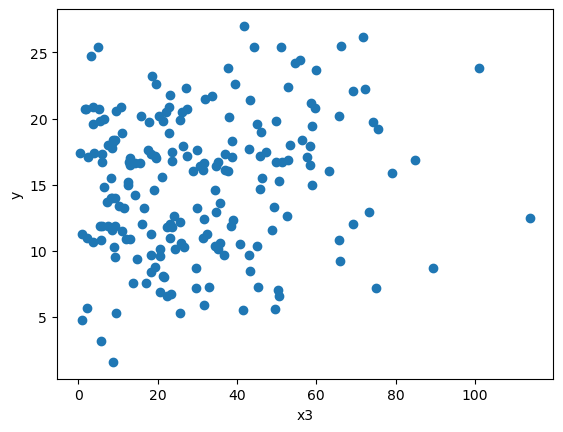

In [12]:
plt.scatter(x[:,2], y)# afficher les résultats. x_3 en abscisse et y en ordonnée
plt.xlabel('x3')
plt.ylabel('y')
plt.show()

In [13]:
# Verification des dimensions
print(x.shape)
print(y.shape)

(200, 3)
(200, 1)


In [14]:
# Création de la matrice X, inclut le Biais
X = np.hstack((x, np.ones((x.shape[0], 1)))) # ajoute un vecteur Biais de dimension (x.shape[0], 1)
print(X.shape)
print(X[:10])

(200, 4)
[[230.1  37.8  69.2   1. ]
 [ 44.5  39.3  45.1   1. ]
 [ 17.2  45.9  69.3   1. ]
 [151.5  41.3  58.5   1. ]
 [180.8  10.8  58.4   1. ]
 [  8.7  48.9  75.    1. ]
 [ 57.5  32.8  23.5   1. ]
 [120.2  19.6  11.6   1. ]
 [  8.6   2.1   1.    1. ]
 [199.8   2.6  21.2   1. ]]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 4)
(40, 4)
(160, 1)
(40, 1)


In [16]:
# Initialisation du vecteur theta aléatoire, avec 4 éléments (car X a quatre colonnes)
theta = np.random.randn(4, 1)
theta

array([[-1.55539097],
       [-0.48016418],
       [-0.08388371],
       [ 1.12322344]])

## 2. Modèle Linéaire

In [17]:
def model(X, theta):
    return X.dot(theta)

## 3. Fonction coût : Erreur Quadratique Moyenne

In [18]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [19]:
cost_function(X_train, y_train, theta)

43361.89376582432

## 4. Gradients et Descente de Gradient

In [20]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [21]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

## 5. Phase d'entrainement

In [22]:
n_iterations = 2000000
learning_rate = 0.00001

theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)
theta_final

array([[0.05513715],
       [0.10316398],
       [0.00591738],
       [4.4908708 ]])

## 6. Courbe d'apprentissage

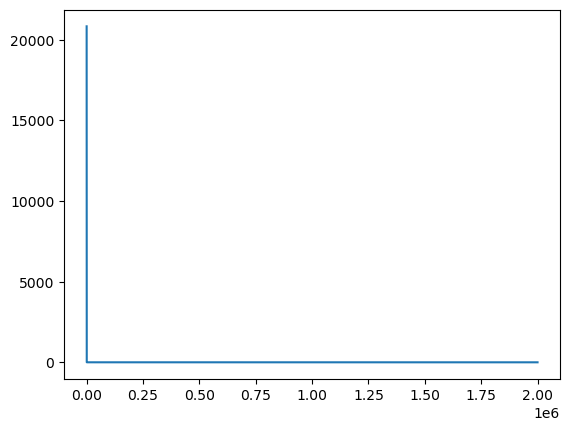

In [23]:
plt.plot(range(n_iterations), cost_history)
plt.show()

## 7. Evaluation du modèle - Coefficient de détermination

In [24]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [25]:
predictions = model(X_train, theta_final)
cd_train_Reg_Mult = coef_determination(y_train, predictions)
print("Coefficient de détermination de Régression Multiple (training set) = ", cd_train_Reg_Mult)

Coefficient de détermination de Régression Multiple (training set) =  0.8998835385838682


In [26]:
predictions = model(X_test, theta_final)
cd_test_Reg_Mult = coef_determination(y_test, predictions)
print("Coefficient de détermination de Régression Multiple (training set) = ", cd_test_Reg_Mult)

Coefficient de détermination de Régression Multiple (training set) =  0.9063249719575114


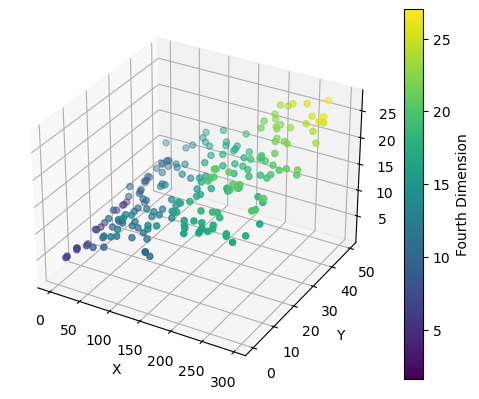

In [27]:
from mpl_toolkits.mplot3d import Axes3D

# Generate sample 4D data
x = dataset["TV"]
y = dataset["Radio"]
z = dataset["Newspaper"]
w = dataset["Sales"]  # Fourth dimension

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Represent the fourth dimension using color
sc = ax.scatter(x, y, w, c=w, cmap='viridis')
plt.colorbar(sc, label='Fourth Dimension')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

# Régression Polynomiale

# 1. Dataset

In [28]:
dataset = pd.read_csv('Advertising.csv')
dataset.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [29]:
dataset.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


# 2. Handling missing data

In [30]:
dataset.isnull().values.sum()

0

In [31]:
x = dataset[['TV', 'Radio', 'Newspaper']].values
y = dataset[['Sales']].values

In [32]:
print(x.shape)
print(y.shape)

(200, 3)
(200, 1)


# 3. Matrice polynomiale

In [33]:
# Ajout des termes polynomiaux
X = np.hstack((x, x[:, 0:1]**2, x[:, 1:2]**2, x[:, 2:3]**2, x[:, 0:1]*x[:, 1:2], x[:, 0:1]*x[:, 2:3], x[:, 1:2]*x[:, 2:3]))

print(X.shape)
print(X[:10])

(200, 9)
[[2.301000e+02 3.780000e+01 6.920000e+01 5.294601e+04 1.428840e+03
  4.788640e+03 8.697780e+03 1.592292e+04 2.615760e+03]
 [4.450000e+01 3.930000e+01 4.510000e+01 1.980250e+03 1.544490e+03
  2.034010e+03 1.748850e+03 2.006950e+03 1.772430e+03]
 [1.720000e+01 4.590000e+01 6.930000e+01 2.958400e+02 2.106810e+03
  4.802490e+03 7.894800e+02 1.191960e+03 3.180870e+03]
 [1.515000e+02 4.130000e+01 5.850000e+01 2.295225e+04 1.705690e+03
  3.422250e+03 6.256950e+03 8.862750e+03 2.416050e+03]
 [1.808000e+02 1.080000e+01 5.840000e+01 3.268864e+04 1.166400e+02
  3.410560e+03 1.952640e+03 1.055872e+04 6.307200e+02]
 [8.700000e+00 4.890000e+01 7.500000e+01 7.569000e+01 2.391210e+03
  5.625000e+03 4.254300e+02 6.525000e+02 3.667500e+03]
 [5.750000e+01 3.280000e+01 2.350000e+01 3.306250e+03 1.075840e+03
  5.522500e+02 1.886000e+03 1.351250e+03 7.708000e+02]
 [1.202000e+02 1.960000e+01 1.160000e+01 1.444804e+04 3.841600e+02
  1.345600e+02 2.355920e+03 1.394320e+03 2.273600e+02]
 [8.600000e+00 

In [34]:
y = y.reshape(-1,1)
y.shape

(200, 1)

# 4. Spliting the data to train and test

In [35]:
x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)

print('x_train shape  : ', x_train.shape)
print('x_test shape  : ', x_test.shape)
print('y_train shape  : ', y_train.shape)
print('y_test shape  : ', y_test.shape)

x_train shape  :  (160, 9)
x_test shape  :  (40, 9)
y_train shape  :  (160, 1)
y_test shape  :  (40, 1)


In [36]:
x_train.mean()

4518.257833333333

In [37]:
x_train.std()

12519.193430080999

# 5. Normalization

In [38]:
def z_score_normalization(data):
    # Calcul des moyennes et des déviations standard de chaque caractéristique
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)

    # Normalisation des données en utilisant la méthode Z-score
    data_normalized = (data - mean) / std

    return data_normalized, mean, std

In [39]:
x_train_norm, mean, std = z_score_normalization(x_train)
x_train_norm

array([[-0.40424839, -1.02823707, -0.33767538, ..., -0.78692467,
        -0.39505518, -0.69943124],
       [ 0.32060772, -0.91982774, -1.16143931, ..., -0.5595303 ,
        -0.72619044, -0.83224356],
       [-1.27051084,  0.2591237 ,  0.25425079, ..., -0.70913217,
        -0.64483881,  0.15265483],
       ...,
       [ 0.80424121,  0.71986334,  1.43317042, ...,  1.1459577 ,
         1.78097963,  1.31899043],
       [ 0.1851428 , -0.87239866, -0.60897488, ..., -0.55654025,
        -0.3447555 , -0.70152976],
       [ 1.54692165, -0.86562307, -0.42153159, ..., -0.20195725,
         0.31497179, -0.65648467]])

In [40]:
x_train_norm.mean()

-4.934324553889585e-18

In [41]:
x_train_norm.std()

1.0

In [42]:
mean

array([1.50019375e+02, 2.28756250e+01, 2.99456250e+01, 2.95878153e+04,
       7.41118688e+02, 1.30772681e+03, 3.49869800e+03, 4.52498288e+03,
       8.01138187e+02])

In [43]:
std

array([8.41546341e+01, 1.47588776e+01, 2.02727984e+01, 2.54284484e+04,
       7.27294449e+02, 1.58236832e+03, 3.31098783e+03, 4.67120285e+03,
       8.91107156e+02])

In [44]:
x_test_norm = (x_test - mean)/std

In [45]:
X_train_norm = np.hstack((x_train_norm, np.ones((x_train.shape[0], 1))))
X_test_norm = np.hstack((x_test_norm, np.ones((x_test.shape[0], 1))))
Y_train = y_train
Y_test = y_test

In [46]:
# Initialisation du vecteur theta aléatoire, avec 3 éléments (car X a trois colonnes)
theta = np.random.randn(10, 1)
theta

array([[-0.51501097],
       [-0.62504386],
       [ 0.75751543],
       [ 2.61186019],
       [-0.3275637 ],
       [ 0.89454335],
       [-1.23995204],
       [ 0.68431248],
       [-0.30689285],
       [ 0.44238161]])

# 6. Modèle Linéaire 

In [47]:
def model(X, theta):
    return X.dot(theta)

# 7. Fonction coût : Erreur Quadratique Moyenne

In [48]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [49]:
cost_function(X_train_norm, Y_train, theta)

122.75769213661493

# 8. Gradients et Descente de Gradient

In [50]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [51]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

# 9. Phase d'entrainement

In [52]:
n_iterations = 1000
learning_rate = 0.3

theta_final, cost_history = gradient_descent(X_train_norm, Y_train, theta, learning_rate, n_iterations)

# 10. Courbe d'apprentissage

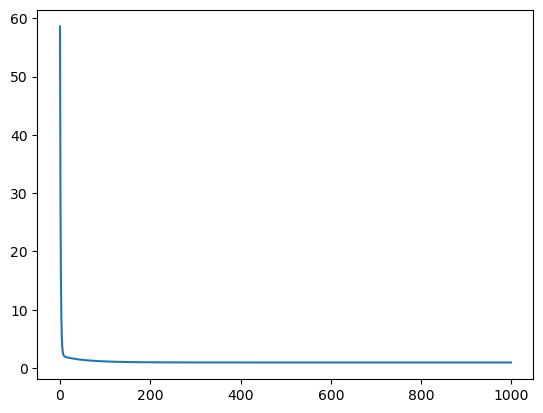

In [53]:
plt.plot(range(n_iterations), cost_history)
plt.show()

# 11. Evaluation du modèle - Coefficient de détermination

In [54]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [55]:
cd_train_Reg_Poly = coef_determination(Y_train, model(X_train_norm, theta_final))
print("Coefficient de détermination de Régression Polynomiale (training set) = ", cd_train_Reg_Poly)

Coefficient de détermination de Régression Polynomiale (training set) =  0.9288133475505796


In [56]:
cd_test_Reg_Poly = coef_determination(Y_test, model(X_test_norm, theta_final))
print("Coefficient de détermination de Régression Polynomiale (test set) = ", cd_test_Reg_Poly)

Coefficient de détermination de Régression Polynomiale (test set) =  0.9533150015628652


In [57]:
from tabulate import tabulate

# Assuming you have calculated cd_train_Reg_Mult, cd_test_Reg_Mult, cd_train_Reg_Poly, cd_test_Reg_Poly

data = [
    ["Regression Multiple (train)", cd_train_Reg_Mult],
    ["Regression Multiple (test)", cd_test_Reg_Mult],
    ["Regression Polynomiale (train)", cd_train_Reg_Poly],
    ["Regression Polynomiale (test)", cd_test_Reg_Poly],
]

print(tabulate(data, headers=["Model", "Coefficient de détermination (R^2)"], tablefmt="pretty"))

best_model = "Regression Multiple" if cd_train_Reg_Mult > cd_train_Reg_Poly else "Regression Polynomiale"
print("Le meilleur modèle est :", best_model)

+--------------------------------+------------------------------------+
|             Model              | Coefficient de détermination (R^2) |
+--------------------------------+------------------------------------+
|  Regression Multiple (train)   |         0.8998835385838682         |
|   Regression Multiple (test)   |         0.9063249719575114         |
| Regression Polynomiale (train) |         0.9288133475505796         |
| Regression Polynomiale (test)  |         0.9533150015628652         |
+--------------------------------+------------------------------------+
Le meilleur modèle est : Regression Polynomiale


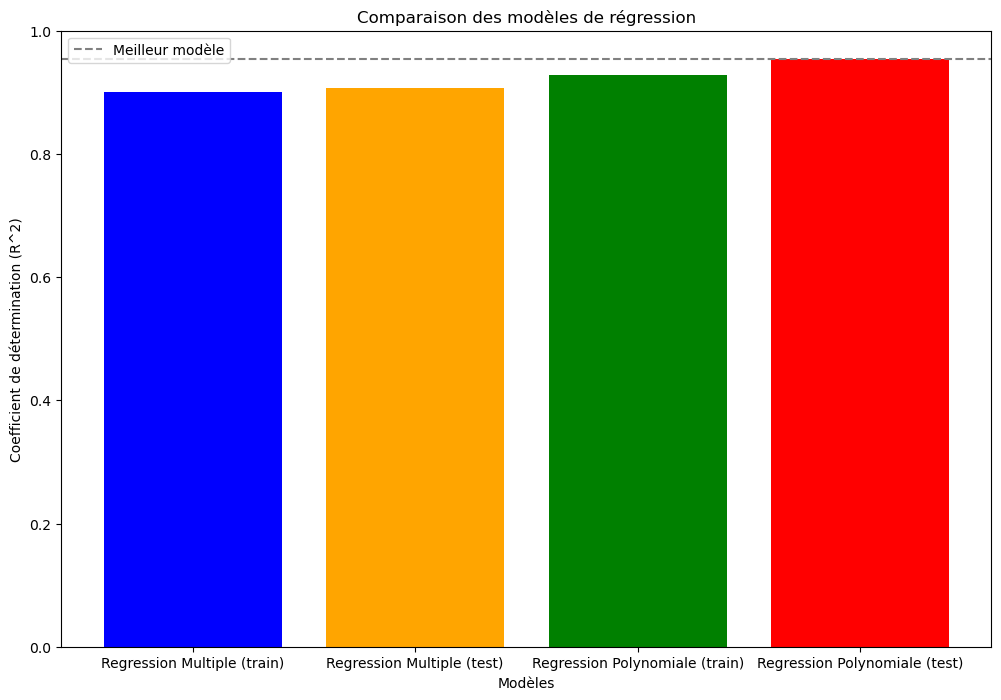

In [63]:
models = ["Regression Multiple (train)", "Regression Multiple (test)", "Regression Polynomiale (train)", "Regression Polynomiale (test)"]
r2_values = [cd_train_Reg_Mult, cd_test_Reg_Mult, cd_train_Reg_Poly, cd_test_Reg_Poly]

plt.figure(figsize=(12, 8))
plt.bar(models, r2_values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Modèles')
plt.ylabel('Coefficient de détermination (R^2)')
plt.title('Comparaison des modèles de régression')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.axhline(max(r2_values), color='gray', linestyle='--', label='Meilleur modèle')  # Add horizontal line for the best model
plt.legend()
plt.show()